In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# %matplotlib notebook

In [3]:
h = 0.1
X = 1
x_0 = 0
y_0 = 1.5

N = int((X - x_0)/h) # 10 

def f(y,x):
    return (-1 * y + np.exp(x))

def Y(x):
    return (np.exp(x)/2 + np.exp(-x))

In [4]:
E = np.zeros((2,4))

In [5]:
x = np.array([int((x_0 + i*h)*10)/10 for i in range(N+1)])
y_1 = np.zeros(N+1) # для Эйлера
y_1[0] = y_0
y_2 = np.zeros(N+1) # для Рунге-Курта 3-го порядка (не то, что на доске, а тот, что на лекции)
y_2[0] = y_0
y_3 = np.zeros(N+1) # для Рунге-Курта 3-го порядка
y_3[0] = y_0
y_4 = np.zeros(N+1) # для Рунге-Курта 4-го порядка
y_4[0] = y_0

In [6]:
x, y_1

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([1.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]))

In [7]:
k = np.zeros((4,N + 1))

In [8]:
for i in range(N): 
    k[0,i] = h*f(y_1[i],x[i])
    y_1[i+1] = y_1[i] + k[0,i]

In [9]:
y_1

array([1.5       , 1.45      , 1.41551709, 1.39610566, 1.39148097,
       1.40151535, 1.42623594, 1.46582422, 1.52061707, 1.59110946,
       1.67795882])

In [10]:
m = 0
s = 0
for i in range(N + 1):
    temp = abs(y_1[i] - Y(x[i]))
    if temp > m: m = temp
    s = s + (abs(y_1[i] - Y(x[i])))**2

E[0,0] = m
E[1,0] = np.sqrt(s)

In [11]:
E

array([[0.04906153, 0.        , 0.        , 0.        ],
       [0.10408869, 0.        , 0.        , 0.        ]])

In [12]:
for i in range(N): 
    k[0,i] = h*f(y_2[i], x[i])
    k[1,i] = h*f(y_2[i]+k[0,i]/2, x[i]+h/2)
    k[2,i] = h*f(y_2[i]+k[1,i]/2, x[i]+h/2)
    dy = (k[0,i] + 2*k[1,i] + k[2,i])/4
    y_2[i+1] = y_2[i] + dy

In [13]:
for i in range(N): 
    k[0,i] = h*f(y_3[i], x[i])
    k[1,i] = h*f(y_3[i]+k[0,i]/3, x[i]+h/3)
    k[2,i] = h*f(y_3[i]+2*k[1,i]/3, x[i]+2*h/3)
    dy = (k[0,i] + 3*k[2,i])/4
    y_3[i+1] = y_3[i] + dy

In [14]:
y_2, y_3

(array([1.5       , 1.45562499, 1.42605081, 1.41095906, 1.41017849,
        1.42368299, 1.45159121, 1.49416752, 1.55182456, 1.62512718,
        1.714798  ]),
 array([1.5       , 1.45741762, 1.42942239, 1.41573404, 1.4162155 ,
        1.43087153, 1.45984875, 1.50343712, 1.56207284, 1.63634272,
        1.72699004]))

In [15]:
m = 0
s = 0
for i in range(N + 1):
    temp = abs(y_2[i] - Y(x[i]))
    if temp > m: m = temp
    s = s + (abs(y_2[i] - Y(x[i])))**2

E[0,1] = m
E[1,1] = np.sqrt(s)

In [16]:
m = 0
s = 0
for i in range(N + 1):
    temp = abs(y_3[i] - Y(x[i]))
    if temp > m: m = temp
    s = s + (abs(y_3[i] - Y(x[i])))**2

E[0,2] = m
E[1,2] = np.sqrt(s)

In [17]:
for i in range(N): 
    k[0,i] = h*f(y_4[i], x[i])
    k[1,i] = h*f(y_4[i]+k[0,i]/2, x[i]+h/2)
    k[2,i] = h*f(y_4[i]+k[1,i]/2, x[i]+h/2)
    k[3,i] = h*f(y_4[i]+k[2,i], x[i]+h)
    dy = (k[0,i] + 2*k[1,i] + 2*k[2,i] + k[3,i])/6
    y_4[i+1] = y_4[i] + dy

In [18]:
y_4

array([1.5       , 1.45742304, 1.42943244, 1.41574807, 1.41623297,
       1.43089199, 1.45987185, 1.50346259, 1.56210048, 1.63637238,
       1.72702165])

In [19]:
m = 0
s = 0
for i in range(N + 1):
    temp = abs(y_4[i] - Y(x[i]))
    if temp > m: m = temp
    s = s + (abs(y_4[i] - Y(x[i])))**2

E[0,3] = m
E[1,3] = np.sqrt(s)

In [20]:
E

array([[4.90615318e-02, 1.22223569e-02, 3.03141419e-05, 1.29090571e-06],
       [1.04088693e-01, 2.57396482e-02, 6.72295042e-05, 2.61131372e-06]])

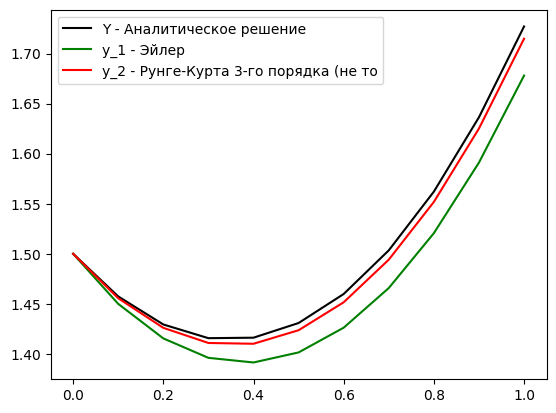

In [21]:
t = np.linspace(x_0, X, N+1)

plt.plot(t, Y(t), color = 'black', label = 'Y - Аналитическое решение')
plt.plot(t, y_1, color = 'g', label = 'y_1 - Эйлер')
plt.plot(t, y_2, color = 'r', label = 'y_2 - Рунге-Курта 3-го порядка (не то')
#plt.plot(t, y_3, color = 'b', label = 'y_3 - Рунге-Курта 3-го порядка')
#plt.plot(t, y_4, color = 'y', label = 'y_4 - Рунге-Курта 4-го порядка')
plt.legend()
plt.show()

# Теперь для 2N

In [22]:
h2 = 0.05
X = 1
x_0 = 0
y_0 = 1.5

N2 = int((X - x_0)/h2) # 20 

def f(y,x):
    return (-1 * y + np.exp(x))

def Y(x):
    return (np.exp(x)/2 + np.exp(-x))
    
E2 = np.zeros((2,4))

x2 = np.array([(x_0 + i*h2) for i in range(N2+1)])
y2_1 = np.zeros(N2+1) # для Эйлера
y2_1[0] = y_0
y2_2 = np.zeros(N2+1) # для Рунге-Курта 3-го порядка (не то, что на доске, а тот, что на лекции)
y2_2[0] = y_0
y2_3 = np.zeros(N2+1) # для Рунге-Курта 3-го порядка
y2_3[0] = y_0
y2_4 = np.zeros(N2+1) # для Рунге-Курта 4-го порядка
y2_4[0] = y_0

k2 = np.zeros((4,N2 + 1))

for i in range(N2): 
    k2[0,i] = h2*f(y2_1[i],x2[i])
    y2_1[i+1] = y2_1[i] + k2[0,i]

m = 0
s = 0
for i in range(N2 + 1):
    temp = abs(y2_1[i] - Y(x2[i]))
    if temp > m: m = temp
    s = s + (abs(y2_1[i] - Y(x2[i])))**2

E2[0,0] = m
E2[1,0] = np.sqrt(s)

for i in range(N2): 
    k2[0,i] = h2*f(y2_2[i], x2[i])
    k2[1,i] = h2*f(y2_2[i]+k2[0,i]/2, x2[i]+h2/2)
    k2[2,i] = h2*f(y2_2[i]+k2[1,i]/2, x2[i]+h2/2)
    dy2 = (k2[0,i] + 2*k2[1,i] + k2[2,i])/4
    y2_2[i+1] = y2_2[i] + dy2

for i in range(N2): 
    k2[0,i] = h2*f(y2_3[i], x2[i])
    k2[1,i] = h2*f(y2_3[i]+k2[0,i]/3, x2[i]+h2/3)
    k2[2,i] = h2*f(y2_3[i]+2*k2[1,i]/3, x2[i]+2*h2/3)
    dy2 = (k2[0,i] + 3*k2[2,i])/4
    y2_3[i+1] = y2_3[i] + dy2

for i in range(N2): 
    k2[0,i] = h2*f(y2_4[i], x2[i])
    k2[1,i] = h2*f(y2_4[i]+k2[0,i]/2, x2[i]+h2/2)
    k2[2,i] = h2*f(y2_4[i]+k2[1,i]/2, x2[i]+h2/2)
    k2[3,i] = h2*f(y2_4[i]+k2[2,i], x2[i]+h2)
    dy2 = (k2[0,i] + 2*k2[1,i] + 2*k2[2,i] + k2[3,i])/6
    y2_4[i+1] = y2_4[i] + dy2

m = 0
s = 0
for i in range(N2 + 1):
    temp = abs(y2_2[i] - Y(x2[i]))
    if temp > m: m = temp
    s = s + (abs(y2_2[i] - Y(x2[i])))**2

E2[0,1] = m
E2[1,1] = np.sqrt(s)

m = 0
s = 0
for i in range(N2 + 1):
    temp = abs(y2_3[i] - Y(x2[i]))
    if temp > m: m = temp
    s = s + (abs(y2_3[i] - Y(x2[i])))**2

E2[0,2] = m
E2[1,2] = np.sqrt(s)

m = 0
s = 0
for i in range(N2 + 1):
    temp = abs(y2_4[i] - Y(x2[i]))
    if temp > m: m = temp
    s = s + (abs(y2_4[i] - Y(x2[i])))**2

E2[0,3] = m
E2[1,3] = np.sqrt(s)

In [23]:
E, E2

(array([[4.90615318e-02, 1.22223569e-02, 3.03141419e-05, 1.29090571e-06],
        [1.04088693e-01, 2.57396482e-02, 6.72295042e-05, 2.61131372e-06]]),
 array([[2.42029172e-02, 6.03924112e-03, 3.70179575e-06, 7.92521491e-08],
        [7.02162613e-02, 1.74541958e-02, 1.12682567e-05, 2.18877538e-07]]))

In [24]:
P = np.zeros((2,4))
for i in range(2):
    for j in range(4):
        P[i,j] = np.log2(E[i,j]/E2[i,j])

In [25]:
P

array([[1.01941133, 1.01708334, 3.03369378, 4.02578976],
       [0.56793628, 0.56041845, 2.57683017, 3.57657998]])

In [26]:
y = np.zeros((4, N+1)) 

y[:,0] = y_0

y

array([[1.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [28]:
h = 0.04
X = 1
x_0 = 0
y_0 = 1.5

N = int((X - x_0)/h) # 10 
x = np.array([int((x_0 + i*h)*N)/N for i in range(N+1)])
x

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  ])